<a href="https://colab.research.google.com/github/vogiahuan352/10FOOD/blob/main/10FOOD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import matplotlib.pyplot as plt
from keras.layers import LeakyReLU
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from keras.utils import to_categorical
from keras.models import load_model
from keras.utils import load_img, img_to_array
import os
from keras.preprocessing.image import ImageDataGenerator

In [12]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [13]:
train_data=ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)


In [14]:
training=train_data.flow_from_directory('/content/drive/MyDrive/10food/train ',target_size=(150,150), batch_size=32, class_mode='categorical')


Found 502 images belonging to 10 classes.


In [15]:
training.class_indices


{'banh_bo': 0,
 'banh_bot_loc': 1,
 'banh_cong': 2,
 'banh_da_lon': 3,
 'banh_khot': 4,
 'banh_mi': 5,
 'banh_tai_heo': 6,
 'banh_tieu': 7,
 'banh_trung_thu': 8,
 'banh_xeo': 9}

In [16]:
model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3), activation='relu', input_shape=(150,150,3), padding='same')) 
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(64,kernel_size=(3,3), activation='relu', padding='same'))
model.add(LeakyReLU(alpha=0.1)) 
model.add(MaxPooling2D(2,2))

model.add(Conv2D(128,kernel_size=(3,3), activation='relu', padding='same')) 
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(2,2))

model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(LeakyReLU(alpha=0.1))
model.add(Dense(10,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 150, 150, 32)      896       
                                                                 
 leaky_re_lu_4 (LeakyReLU)   (None, 150, 150, 32)      0         
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 75, 75, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 leaky_re_lu_5 (LeakyReLU)   (None, 75, 75, 64)        0         
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                  

In [17]:
train=model.fit(training,epochs=50,batch_size=128,verbose=1)


Epoch 1/50
16/16 [==============================] - 28s 2s/step - loss: 2.3461 - accuracy: 0.1036
Epoch 2/50
16/16 [==============================] - 25s 2s/step - loss: 2.0791 - accuracy: 0.2311
Epoch 3/50
16/16 [==============================] - 24s 1s/step - loss: 1.8970 - accuracy: 0.2610
Epoch 4/50
16/16 [==============================] - 23s 1s/step - loss: 1.7506 - accuracy: 0.3606
Epoch 5/50
16/16 [==============================] - 24s 1s/step - loss: 1.6408 - accuracy: 0.4004
Epoch 6/50
16/16 [==============================] - 24s 1s/step - loss: 1.5476 - accuracy: 0.4442
Epoch 7/50
16/16 [==============================] - 23s 1s/step - loss: 1.3407 - accuracy: 0.5279
Epoch 8/50
16/16 [==============================] - 24s 2s/step - loss: 1.2654 - accuracy: 0.5558
Epoch 9/50
16/16 [==============================] - 24s 2s/step - loss: 1.2353 - accuracy: 0.5697
Epoch 10/50
16/16 [==============================] - 25s 2s/step - loss: 1.0600 - accuracy: 0.6554
Epoch 11/50
16/16 [

In [18]:
# Đánh giá độ chính xác của mô hình 
Score=model.evaluate(training,verbose=0)
print('Train Loss', Score[0])
print('Train Accuracy', Score[1])

Train Loss 0.01238296739757061
Train Accuracy 0.9960159659385681


In [19]:
#Lưu
from keras.models import load_model
model.save("food(CNN).h5")
model_1=load_model('food(CNN).h5')

1/1 [==============================] - 0s 80ms/step
banh_bo


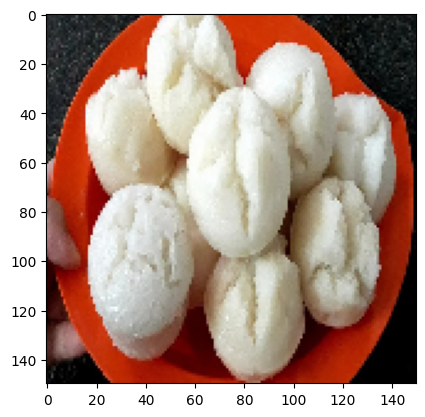

1/1 [==============================] - 0s 29ms/step
banh_bo


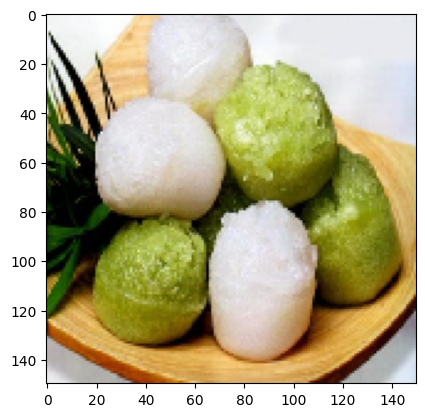

1/1 [==============================] - 0s 31ms/step
banh_bo


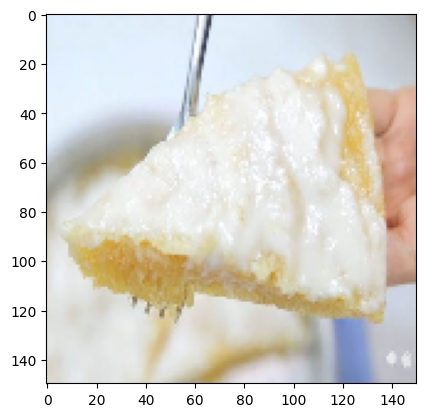

1/1 [==============================] - 0s 39ms/step
banh_bot_loc


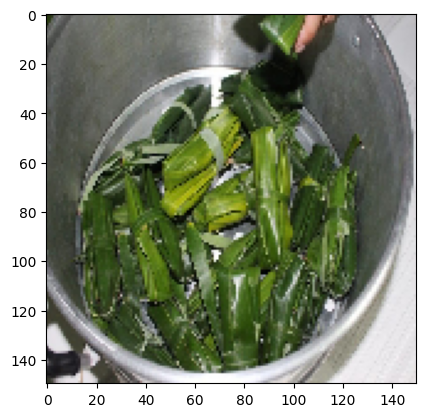

1/1 [==============================] - 0s 30ms/step
banh_bot_loc


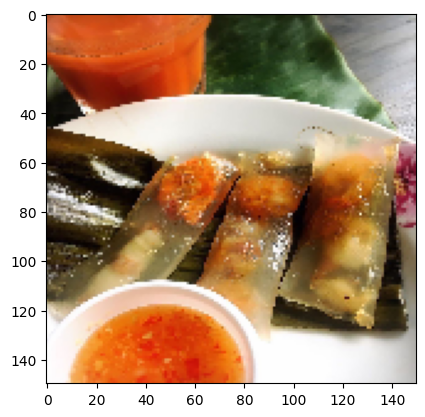

1/1 [==============================] - 0s 29ms/step
banh_cong


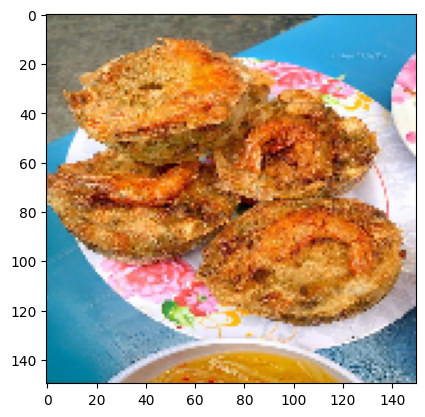

1/1 [==============================] - 0s 38ms/step
banh_bot_loc


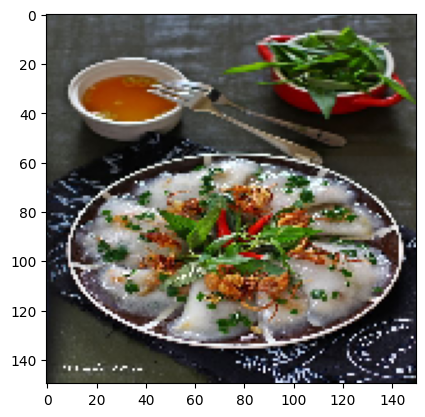

1/1 [==============================] - 0s 35ms/step
banh_cong


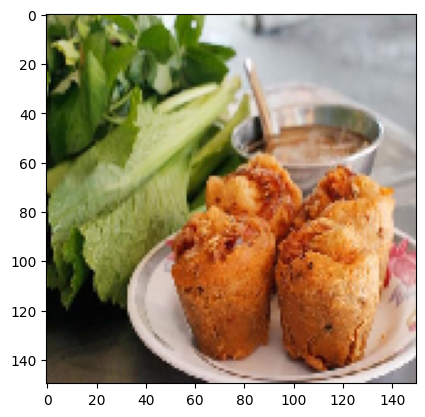

1/1 [==============================] - 0s 54ms/step
banh_da_lon


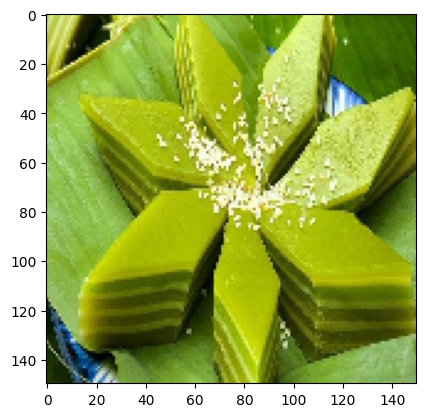

1/1 [==============================] - 0s 66ms/step
banh_cong


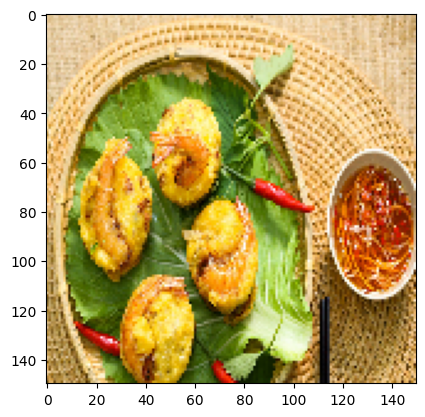

1/1 [==============================] - 0s 40ms/step
banh_da_lon


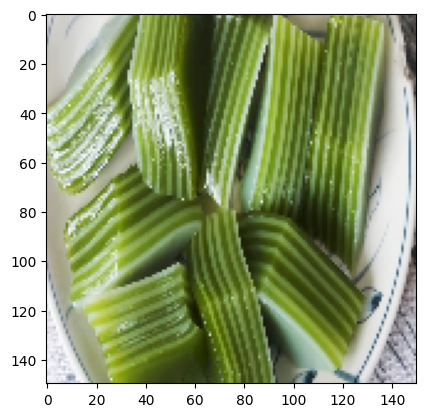

1/1 [==============================] - 0s 49ms/step
banh_da_lon


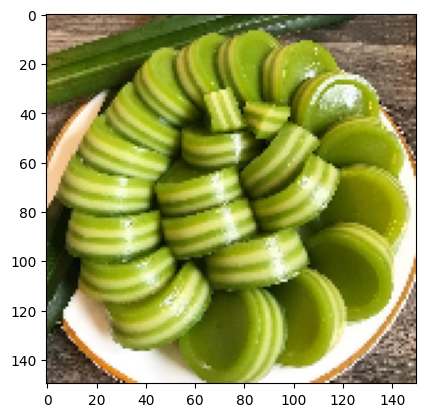

1/1 [==============================] - 0s 67ms/step
banh_khot


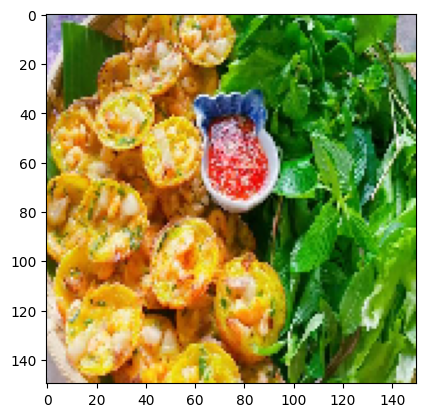

1/1 [==============================] - 0s 70ms/step
banh_mi


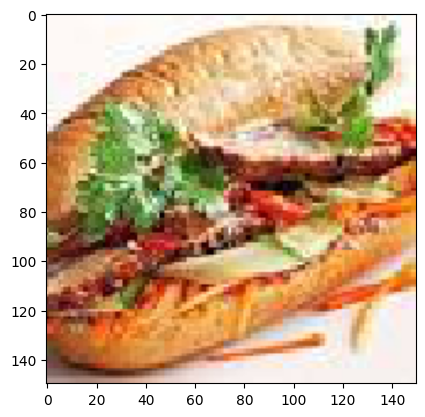

1/1 [==============================] - 0s 56ms/step
banh_mi


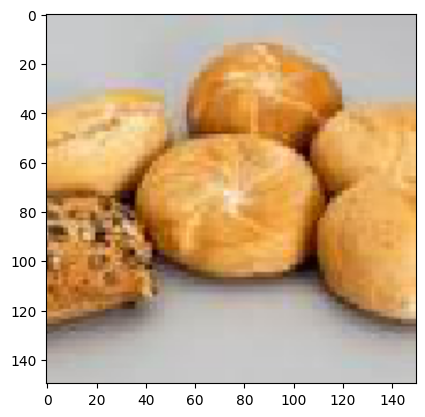

1/1 [==============================] - 0s 79ms/step
banh_tai_heo


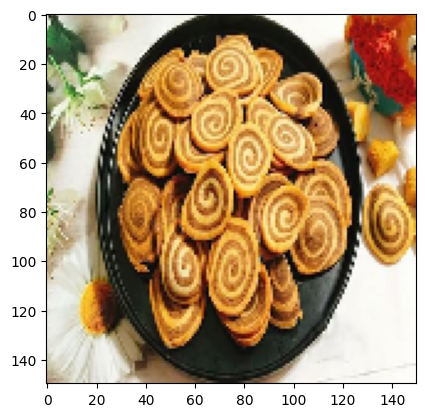

1/1 [==============================] - 0s 37ms/step
banh_tai_heo


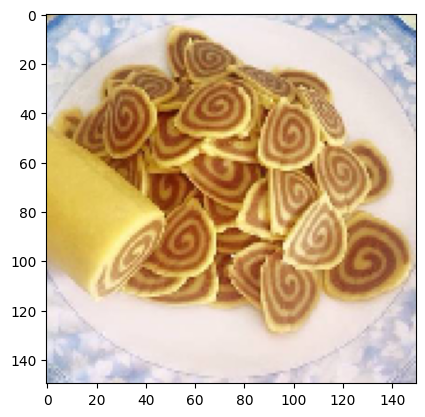

1/1 [==============================] - 0s 41ms/step
banh_tieu


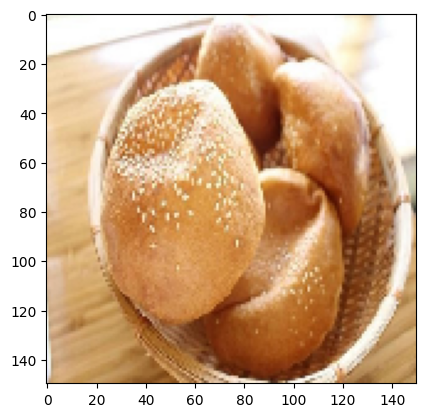

1/1 [==============================] - 0s 36ms/step
banh_trung_thu


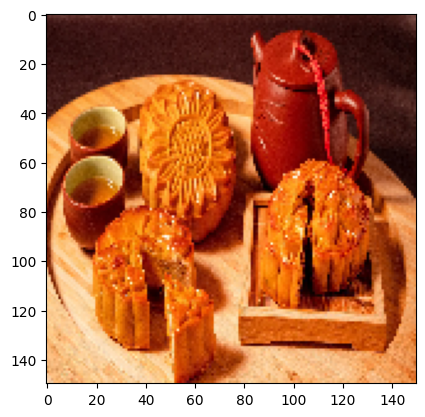

1/1 [==============================] - 0s 55ms/step
banh_trung_thu


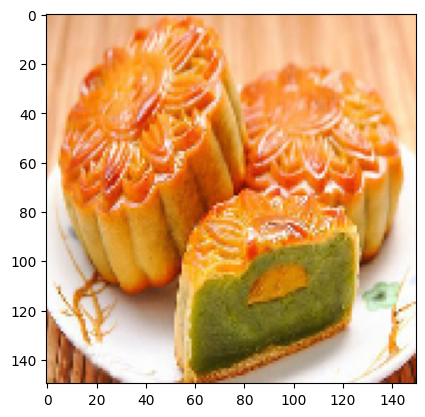

1/1 [==============================] - 0s 38ms/step
banh_xeo


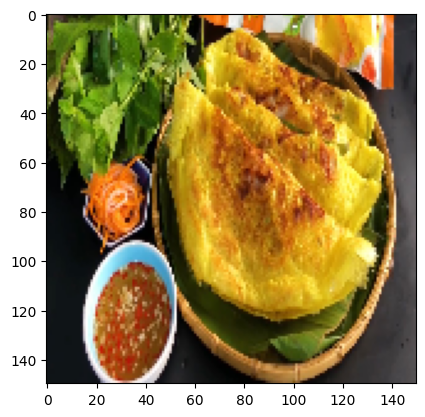

In [20]:
from keras.models import load_model
from keras.utils import load_img, img_to_array
import os
import numpy as np 
test='/content/drive/MyDrive/10food/test'

for i in os.listdir(test):
  img=load_img(test+'/'+i,target_size=(150,150))
  plt.imshow(img)
  img=img_to_array(img) 
  img=img.astype('float32') 
  img=img/255 
  img=np.expand_dims(img,axis=0)
  result=(model_1.predict(img).argmax()) 
  class_name=['banh_bo','banh_bot_loc','banh_cong','banh_da_lon','banh_khot','banh_mi','banh_tai_heo','banh_tieu','banh_trung_thu','banh_xeo']
  print(class_name[result])
  plt.show()

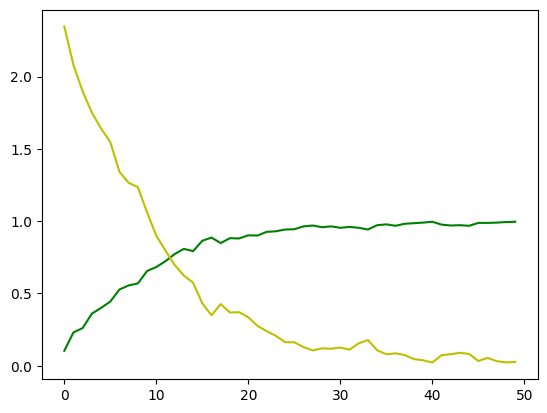

In [21]:
import matplotlib.pyplot as plt      
accuracy = train.history['accuracy']
loss = train.history['loss']    
epochs = range(len(accuracy))
plt.plot(epochs,accuracy,'g',label = 'Training accuracy')
plt.plot(epochs,loss,'y',label = 'Training loss')
plt.show()